In [1]:
%run script/setup.py

In [2]:
import script.preprocessing as pre

# Citations information from OpenAlex

In [9]:
BASE_URL = 'https://api.openalex.org/'
ENDPOINT = 'authors'
MAIL = 'elsa@itu.dk'
mail = f'&mailto={MAIL}'

complete_url = BASE_URL + ENDPOINT

In [10]:
# load data
df_invited = pd.read_csv('Data/factInvited.csv')
df_proceedings = pd.read_csv('Data/factProceedings.csv')

df = pd.concat([df_invited, df_proceedings], ignore_index=True)
pd.set_option('display.max_rows', 15)

In [11]:
full_name = df['Full name'].unique()

len(full_name)

67381

Trying to take care of exceptions

In [ ]:
chunk_size = 100

# creating an empty dataframe
columns = ['Full name', 'OpenAlex ID', 'ORCID', 'Works count']
df_author_id = pd.DataFrame({col: [None]*len(full_name) for col in columns})

# DELETE THE LIMIT!!!
for j in range(0, len(full_name[0:10]), chunk_size):

    chunk = full_name[j:j+chunk_size]
    ids = []
    orcids = []
    works_count = []
    results = []
    failure = False

    for i in chunk:

        filter = f'?search={i}'
        complete_url = BASE_URL + ENDPOINT + filter + mail
        try:
            response = requests.get(complete_url)
            response.raise_for_status()
            response_json = response.json()
            author_data = response_json['results']

        except requests.exceptions.RequestException as e:
            print(f"Request failed for {i}: {e}")
            failure = True
            continue
        except ValueError as e:
            print(f"JSON decoding failed for {i}: {e}")
            failure = True
            continue
        except requests.exceptions.JSONDecodeError as e:
            print(f"JSON decoding failed for {i}: {e}")
            failure = True
            continue

        results.append(len(author_data))

        # API failures
        if failure:

            # nan value is manually add to the arrays
            works_count.append([float('nan')])
            ids.append([float('nan')])
            orcids.append([float('nan')])

        # no results found
        elif len(author_data) == 0:

            works_count.append([None])
            ids.append([None])
            orcids.append([None])

        # found only one results
        elif len(author_data) == 1:

            works_count.append([author_data[0]['works_count']])
            ids.append([author_data[0]['id']])
            orcids.append([author_data[0]['orcid']])

        # found more results
        else:
            
            # store a list with the works count for every result
            works_count.append([author_data[result]['works_count'] for result in range(len(author_data))])
            # store a list with the ids for every result
            ids.append([author_data[result]['id'] for result in range(len(author_data))])
            # check on the orcid codes
            orcid_codes = [author_data[result]['orcid'] for result in range(len(author_data))]
            different_orcids = set(code for code in orcid_codes if code is not None)
            # manually adding a None value if no orcid code is found
            if not different_orcids:
                different_orcids.add(None)

            orcids.append(list(different_orcids))

    # the dataframe is filled after every chunk to not loose data
    df_author_id['Full name'][j:j+chunk_size] = chunk
    df_author_id['OpenAlex ID'][j:j+chunk_size] = ids
    df_author_id['ORCID'][j:j+chunk_size] = orcids
    df_author_id['Works count'][j:j+chunk_size] = works_count

True
True
0 2
[[nan], [nan]]
False
False
2 4
[['https://openalex.org/A5001852581'], ['https://openalex.org/A5052827274', 'https://openalex.org/A5006626552']]
False
False
4 6
[['https://openalex.org/A5043141178'], ['https://openalex.org/A5069313083', 'https://openalex.org/A5097912024']]
False
False
6 8
[['https://openalex.org/A5047214685', 'https://openalex.org/A5039490548', 'https://openalex.org/A5051700311', 'https://openalex.org/A5020060083', 'https://openalex.org/A5065586840', 'https://openalex.org/A5019586550', 'https://openalex.org/A5005297246', 'https://openalex.org/A5058812869', 'https://openalex.org/A5080646462', 'https://openalex.org/A5043308820', 'https://openalex.org/A5065810297', 'https://openalex.org/A5048380473', 'https://openalex.org/A5077853400', 'https://openalex.org/A5017087873', 'https://openalex.org/A5068502898', 'https://openalex.org/A5056803298', 'https://openalex.org/A5036338191', 'https://openalex.org/A5071569280', 'https://openalex.org/A5048116243', 'https://op

In [50]:
df_author_id

,Full name,OpenAlex ID,ORCID,Works count
0,Alex Sandy Pentland,[nan],[nan],[nan]
1,Astro Teller,[nan],[nan],[nan]
2,Daniel J. Clancy,[https://openalex.org/A5001852581],[None],[100]
3,Edward Feigenbaum,"[https://openalex.org/A5052827274, https://ope...",[None],"[199, 11]"
4,Ian Lane Davis,[https://openalex.org/A5043141178],[None],[15]
...,...,...,...,...
67376,None,None,None,None
67377,None,None,None,None
67378,None,None,None,None
67379,None,None,None,None


In [5]:
df_author_id = pd.DataFrame(columns = ['Full name', 'OpenAlex ID', 'ORCID', 'Works count'])
df_author_id['Full name'] = full_name[0:10]
df_author_id['OpenAlex ID'] = ids
df_author_id['ORCID'] = orcids
df_author_id['Works count'] = works_count

NameError: name 'ids' is not defined

In [ ]:
df_author_id

,Full name,OpenAlex ID,ORCID,Works count
0,Alex Sandy Pentland,"[https://openalex.org/A5067118505, https://ope...",[https://orcid.org/0000-0002-8053-9983],"[420, 148, 1, 1]"
1,Astro Teller,[https://openalex.org/A5046049741],[None],[20]
2,Daniel J. Clancy,[https://openalex.org/A5001852581],[None],[100]
3,Edward Feigenbaum,"[https://openalex.org/A5052827274, https://ope...",[None],"[199, 11]"
4,Ian Lane Davis,[https://openalex.org/A5043141178],[None],[15]
5,Martha E. Pollack,"[https://openalex.org/A5069313083, https://ope...",[None],"[218, 1]"
6,Paul Cohen,"[https://openalex.org/A5047214685, https://ope...","[https://orcid.org/0000-0001-5928-2127, https:...","[180, 543, 503, 225, 482, 189, 305, 74, 572, 1..."
7,Peter Norvig,"[https://openalex.org/A5080389385, https://ope...",[None],"[127, 2]"
8,Russ B. Altman,"[https://openalex.org/A5084043782, https://ope...",[https://orcid.org/0000-0003-3859-2905],"[611, 258, 1, 1, 0]"
9,Sebastian Thrun,"[https://openalex.org/A5066710774, https://ope...",[None],"[455, 1]"


In [14]:
#filename = "authorID.csv" # or factProceedings.csv
#filepath = "./Data/"
df_author_id.to_csv(os.path.join(filepath, filename), index=False)
print("The file is now saved")

The file is now saved


## Analysis

In [12]:
def tranform_to_list_of_string(data):

    data = data.replace("'", "").strip("[").strip("]").replace(" ", "")
    converted_data = data.split(",")
    converted_data = [None if i == 'None' else np.nan if i == 'nan' else i for i in converted_data]

    return converted_data

In [13]:
def tranform_to_list_of_int(data):

    data = data.replace("'", "").strip("[").strip("]")
    convetred_data = data.split(",")
    #most likely this is deleting all the None, this is not what I want
    convetred_data = [None if i == 'None' else np.nan if i == 'nan' else int(i) for i in convetred_data]

    return convetred_data

In [14]:
data_types = {
              'Full name' : str
             }

converters = {
              'OpenAlex ID' : pre.tranform_to_list_of_string,
              'ORCID' : pre.tranform_to_list_of_string,
              'Works count' : pre.tranform_to_list_of_int
}

df_author = pd.read_csv('Data/authorID.csv', dtype=data_types, converters=converters)

In [15]:
df_author

,Full name,OpenAlex ID,ORCID,Works count
0,Alex Sandy Pentland,"[https://openalex.org/A5067118505, https://ope...",[https://orcid.org/0000-0002-8053-9983],"[420, 148, 1, 1]"
1,Astro Teller,[https://openalex.org/A5046049741],[None],[20]
2,Daniel J. Clancy,[https://openalex.org/A5001852581],[None],[100]
3,Edward Feigenbaum,"[https://openalex.org/A5052827274, https://ope...",[None],"[199, 11]"
4,Ian Lane Davis,[https://openalex.org/A5043141178],[None],[15]
...,...,...,...,...
67376,Rustam Galimullin,"[https://openalex.org/A5064340585, https://ope...",[https://orcid.org/0000-0003-4195-8189],"[28, 1]"
67377,Tiziano Dalmonte,[https://openalex.org/A5019687464],[https://orcid.org/0000-0002-7153-0506],[21]
67378,Tomas Svoboda,"[https://openalex.org/A5046322438, https://ope...","[https://orcid.org/0000-0003-2734-4746, https:...","[95, 410, 13, 9, 130, 3, 2, 1, 2]"
67379,Tomoyuki Yamakami,"[https://openalex.org/A5085555714, https://ope...",[None],"[219, 2]"


Checking for missing data due to API failures, authors not found on OpenAlex, and authors without a ORCID.

In [16]:
failures = 0
not_found = 0
no_ORCID = 0

for i in df_author['OpenAlex ID']:

    if np.nan in i:
        failures += 1
    if None in i:
        not_found += 1

no_ORCID = 0
for i in df_author['ORCID']:

    if None in i:

        no_ORCID += 1

print('API failures:', failures)
print('Missing authors:', not_found)
print('Missing ORCID:', no_ORCID)

API failures: 0
Missing authors: 305
Missing ORCID: 24788


Disambiguation problem: how many result I find for each author??

In [17]:
number_of_results = df_author['OpenAlex ID'].apply(len)
multiple_authors = number_of_results[number_of_results>1]

print(f"author with multiple results: {len(multiple_authors)} ({(len(multiple_authors)/len(full_name))} %)")

author with multiple results: 43695 (0.648476573514789 %)


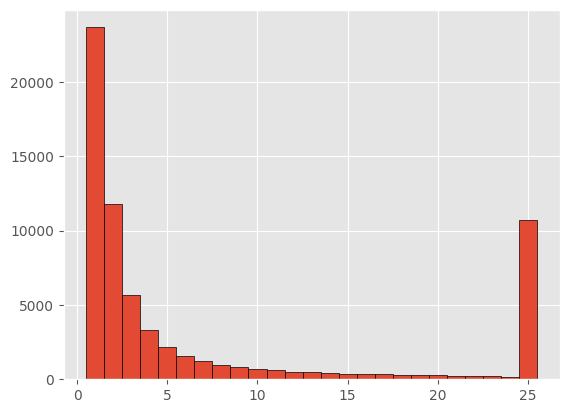

In [18]:
# Create the histogram
plt.hist(number_of_results, bins=range(min(number_of_results), max(number_of_results) + 2), edgecolor='black', align='left');

## Trying to filter data

In [19]:
df_author['Number of results'] = number_of_results
df_author[(df_author['Number of results'] > 1) & (df_author['Number of results'] < 25)]

,Full name,OpenAlex ID,ORCID,Works count,Number of results
0,Alex Sandy Pentland,"[https://openalex.org/A5067118505, https://ope...",[https://orcid.org/0000-0002-8053-9983],"[420, 148, 1, 1]",4
3,Edward Feigenbaum,"[https://openalex.org/A5052827274, https://ope...",[None],"[199, 11]",2
5,Martha E. Pollack,"[https://openalex.org/A5069313083, https://ope...",[None],"[218, 1]",2
7,Peter Norvig,"[https://openalex.org/A5080389385, https://ope...",[None],"[127, 2]",2
8,Russ B. Altman,"[https://openalex.org/A5084043782, https://ope...",[https://orcid.org/0000-0003-3859-2905],"[611, 258, 1, 1]",4
...,...,...,...,...,...
67371,Mattia Panettiere,"[https://openalex.org/A5031603467, https://ope...",[https://orcid.org/0000-0002-9218-5449],"[24, 2]",2
67374,Pierre Ludmann,"[https://openalex.org/A5036163316, https://ope...",[None],"[9, 1]",2
67376,Rustam Galimullin,"[https://openalex.org/A5064340585, https://ope...",[https://orcid.org/0000-0003-4195-8189],"[28, 1]",2
67378,Tomas Svoboda,"[https://openalex.org/A5046322438, https://ope...","[https://orcid.org/0000-0003-2734-4746, https:...","[95, 410, 13, 9, 130, 3, 2, 1, 2]",9


In [17]:
def get_author_works(author_id):

    works = []
    next_cursor = "*"
    while True:
        filter = f'?filter=author.id:{author_id}&select=id,display_name,concepts&per-page=200&cursor={next_cursor}'
        works_url = BASE_URL + ENDPOINT + filter + mail
        response = requests.get(works_url)
        response.raise_for_status()
        response_json = response.json()
        works.extend(response_json['results'])
        
        # Check if there's a next page
        if 'meta' in response_json and 'next_cursor' in response_json['meta']:
            next_cursor = response_json['meta']['next_cursor']
         
            if next_cursor is None:
                break
        else:
            break
    
    return works

In [20]:
def filter_authors_for_field(author_id, field_id='https://openalex.org/fields/17'):

    next_cursor = "*"
    
    # contains the topics for all the work of the searche author
    works_topics = []
    cs_works = 0

    while True:
        filter = f'?filter=author.id:{author_id}&select=topics&per-page=200&cursor={next_cursor}'
        works_url = BASE_URL + ENDPOINT + filter + mail
        response = requests.get(works_url)
        response.raise_for_status()
        response_json = response.json()
        works_topics.extend(response_json['results'])
        
        # Check if there's a next page
        if 'meta' in response_json and 'next_cursor' in response_json['meta']:
            next_cursor = response_json['meta']['next_cursor']
         
            if next_cursor is None:
                break
        else:
            break
    
    for works_topic in works_topics:
        fields = [field_id['field']['id'] for field_id in works_topic['topics']]
    
        if any(field  == field_id for field in fields):
            cs_works += 1

    if cs_works >= 1:
        return author_id, cs_works

In [21]:
df_disambiguated = df_author[(df_author['Number of results'] > 1) & (df_author['Number of results'] < 25)]

In [120]:
df_disambiguated['OpenAlex ID'][0:5].index

Index([0, 3, 5, 7, 8], dtype='int64')

In [123]:
len(df_author)

67381

In [25]:
j = 0
chunk_size = 100
chunk = df_disambiguated[j:j+chunk_size]
chunk['OpenAlex ID']

0      [https://openalex.org/A5067118505, https://ope...
3      [https://openalex.org/A5052827274, https://ope...
5      [https://openalex.org/A5069313083, https://ope...
7      [https://openalex.org/A5080389385, https://ope...
8      [https://openalex.org/A5084043782, https://ope...
                             ...                        
156    [https://openalex.org/A5082478319, https://ope...
157    [https://openalex.org/A5082318082, https://ope...
158    [https://openalex.org/A5066565101, https://ope...
159    [https://openalex.org/A5087076980, https://ope...
160    [https://openalex.org/A5061654061, https://ope...
Name: OpenAlex ID, Length: 100, dtype: object

In [31]:
for j in range(0, len(df_disambiguated[0:10]), chunk_size):
    print(j)

0


In [35]:
df_cleaned= df_author.copy()
df_cleaned['Computer science works'] = [None]*len(df_author)

for j in range(0, len(df_disambiguated), chunk_size):

    chunk = df_disambiguated[j:j+chunk_size]

    for index, possible_authors in chunk.items():

        number_cs_works = []
        cs_authors = []

        for candidate in possible_authors:

            filtered_authors = filter_authors_for_field(candidate)
            if filtered_authors is not None:
                cs_authors.append(filtered_authors[0])
                number_cs_works.append(filtered_authors[1])
        
        df_cleaned.at[index, 'OpenAlex ID'] = cs_authors
        df_cleaned.at[index, 'Computer science works'] = number_cs_works

               Full name                                        OpenAlex ID  \
0    Alex Sandy Pentland  [https://openalex.org/A5067118505, https://ope...   
3      Edward Feigenbaum  [https://openalex.org/A5052827274, https://ope...   
5      Martha E. Pollack  [https://openalex.org/A5069313083, https://ope...   
7           Peter Norvig  [https://openalex.org/A5080389385, https://ope...   
8         Russ B. Altman  [https://openalex.org/A5084043782, https://ope...   
..                   ...                                                ...   
156         Ki-soo Hwang  [https://openalex.org/A5082478319, https://ope...   
157            Leon Stok  [https://openalex.org/A5082318082, https://ope...   
158         Mitsuo Saito  [https://openalex.org/A5066565101, https://ope...   
159  Wolfgang Rosenstiel  [https://openalex.org/A5087076980, https://ope...   
160      Chung-laung Liu  [https://openalex.org/A5061654061, https://ope...   

                                       ORCID  \
0  

               Full name                                        OpenAlex ID  \
612     Igor Walukiewicz  [https://openalex.org/A5064757019, https://ope...   
615      Samson Abramsky  [https://openalex.org/A5081687891, https://ope...   
616        Glynn Winskel  [https://openalex.org/A5062948122, https://ope...   
617        Jane Hillston  [https://openalex.org/A5035860397, https://ope...   
618     Michael Benedikt  [https://openalex.org/A5037774973, https://ope...   
..                   ...                                                ...   
762        Ayanna Howard  [https://openalex.org/A5038825611, https://ope...   
763  David Spiegelhalter  [https://openalex.org/A5041725375, https://ope...   
768         Celeste Kidd  [https://openalex.org/A5085832456, https://ope...   
769           Dana Pe'er  [https://openalex.org/A5074451448, https://ope...   
770            Jeff Heer  [https://openalex.org/A5090570042, https://ope...   

                                                 OR

In [137]:
df_author[0:5]

,Full name,OpenAlex ID,ORCID,Works count
0,Alex Sandy Pentland,"[https://openalex.org/A5067118505, https://ope...",[https://orcid.org/0000-0002-8053-9983],"[420, 148, 1, 1]"
1,Astro Teller,[https://openalex.org/A5046049741],[None],[20]
2,Daniel J. Clancy,[https://openalex.org/A5001852581],[None],[100]
3,Edward Feigenbaum,"[https://openalex.org/A5052827274, https://ope...",[None],"[199, 11]"
4,Ian Lane Davis,[https://openalex.org/A5043141178],[None],[15]


In [138]:
df_cleaned[0:5]

,Full name,OpenAlex ID,ORCID,Works count,Computer science works
0,Alex Sandy Pentland,"[https://openalex.org/A5067118505, https://ope...",[https://orcid.org/0000-0002-8053-9983],"[420, 148, 1, 1]","[180, 73, 1]"
1,Astro Teller,[https://openalex.org/A5046049741],[None],[20],None
2,Daniel J. Clancy,[https://openalex.org/A5001852581],[None],[100],None
3,Edward Feigenbaum,[https://openalex.org/A5052827274],[None],"[199, 11]",[91]
4,Ian Lane Davis,[https://openalex.org/A5043141178],[None],[15],None


In [ ]:
# Create an example DataFrame
data = {
    'Author': ['Alice', 'Bob', 'Charlie', 'David'],
    'Number of results': [10, 5, 30, 20],
    'Field': ['CS', 'Math', 'Physics', 'Bio']
}
df = pd.DataFrame(data)

# Specify the index of the row to be updated
index_to_update = 1

# Define the new values
new_values = {
    'Author': 'Robert',
    'Number of results': 15,
    'Field': 'Computer Science'
}

# Update the row at the specified index
df.loc[index_to_update, list(new_values.keys())] = list(new_values.values())

# Print the updated DataFrame
print(df)

In [99]:
df_author[(df_author['OpenAlex ID'].apply(len) > 1) & (df_author['OpenAlex ID'].apply(len) < 25)]

,Full name,OpenAlex ID,ORCID,Works count,Number of results
0,Alex Sandy Pentland,"[https://openalex.org/A5067118505, https://ope...",[https://orcid.org/0000-0002-8053-9983],"[420, 148, 1, 1]",4
3,Edward Feigenbaum,"[https://openalex.org/A5052827274, https://ope...",[None],"[199, 11]",2
5,Martha E. Pollack,"[https://openalex.org/A5069313083, https://ope...",[None],"[218, 1]",2
7,Peter Norvig,"[https://openalex.org/A5080389385, https://ope...",[None],"[127, 2]",2
8,Russ B. Altman,"[https://openalex.org/A5084043782, https://ope...",[https://orcid.org/0000-0003-3859-2905],"[611, 258, 1, 1]",4
...,...,...,...,...,...
67371,Mattia Panettiere,"[https://openalex.org/A5031603467, https://ope...",[https://orcid.org/0000-0002-9218-5449],"[24, 2]",2
67374,Pierre Ludmann,"[https://openalex.org/A5036163316, https://ope...",[None],"[9, 1]",2
67376,Rustam Galimullin,"[https://openalex.org/A5064340585, https://ope...",[https://orcid.org/0000-0003-4195-8189],"[28, 1]",2
67378,Tomas Svoboda,"[https://openalex.org/A5046322438, https://ope...","[https://orcid.org/0000-0003-2734-4746, https:...","[95, 410, 13, 9, 130, 3, 2, 1, 2]",9


## Domains
Domains seem to be 25 but they are actually 4 and none of them is computer sciences. Most likely, computer science is the subfield within Physical Sciences domain. I do not want to try my luck.

In [140]:
complete_url = 'https://api.openalex.org/topics'
filter = '?select=domain'
complete_url = complete_url + filter + mail
response = requests.get(complete_url).json()
domains = response['results']

https://api.openalex.org/topics?select=domain&mailto=elsa@itu.dk


In [143]:
domains

[{'domain': {'id': 'https://openalex.org/domains/3',
   'display_name': 'Physical Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/3',
   'display_name': 'Physical Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_name': 'Social Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/1',
   'display_name': 'Life Sciences'}},
 {'domain': {'id': 'https://openalex.org/domains/2',
   'display_nam

In [75]:
len(works)

350

In [ ]:
# Iterate through the results and filter based on the computer science field
for author in authors:
    if 'works_count' in author and author['works_count'] > 0:
        # Fetch author's works to check their fields
        works_url = BASE_URL + f'works?filter=author.id:{author["id"]}&per-page=100'
        works_response = requests.get(works_url)
        works_response.raise_for_status()
        works = works_response.json()['results']

        for work in works:
            if 'concepts' in work:
                if any(concept['id'] == computer_science_concept_id for concept in work['concepts']):
                    cs_authors.append(author)
                    break

Search for an author by its name

In [153]:
i = 'Stronzo bestiale'
filter = f'?search={i}'
complete_url = BASE_URL + ENDPOINT + filter
response_json = requests.get(complete_url).json()
author_data = response_json['results']

In [154]:
author_data

[{'id': 'https://openalex.org/A5074178785',
  'orcid': None,
  'display_name': 'S. Bestiale',
  'display_name_alternatives': ['S. Bestiale', 'Stronzo Bestiale'],
  'relevance_score': 2575.696,
  'works_count': 3,
  'cited_by_count': 189,
  'summary_stats': {'2yr_mean_citedness': 0.0, 'h_index': 2, 'i10_index': 2},
  'ids': {'openalex': 'https://openalex.org/A5074178785'},
  'affiliations': [{'institution': {'id': 'https://openalex.org/I129774422',
     'ror': 'https://ror.org/03prydq77',
     'display_name': 'University of Vienna',
     'country_code': 'AT',
     'type': 'education',
     'lineage': ['https://openalex.org/I129774422']},
    'years': [1987]}],
  'last_known_institutions': [{'id': 'https://openalex.org/I129774422',
    'ror': 'https://ror.org/03prydq77',
    'display_name': 'University of Vienna',
    'country_code': 'AT',
    'type': 'education',
    'lineage': ['https://openalex.org/I129774422']}],
  'topics': [{'id': 'https://openalex.org/T10591',
    'display_name': 

Notes on how to retrieve the works of an autor from a start to an end date

In [ ]:
id = df_author_id['OpenAlex ID'][0][0]
id = id.split('/')[-1]
ENDPOINT =  'works'
filter = f'?filter=authorships.author.id:{id},from_publication_date:{start_date},to_publication_date:{end_date}'
complete_url = BASE_URL + ENDPOINT + filter + mail
print(complete_url)

Prova

In [ ]:
id = df_author_id['OpenAlex ID'][0][0]
id = id.split('/')[-1]
ENDPOINT =  'author'
filter = f'?filter=authorships.author.id:{id},from_publication_date:{start_date},to_publication_date:{end_date}'
complete_url = BASE_URL + ENDPOINT + filter + mail
print(complete_url)

## Understand how back in time I can go.

In [14]:
ENDPOINT = 'works'

for year in range(1900, 1690, -10):

    end_date = f'{year}-01-01'
    filter = f'?filter=to_publication_date:{end_date}'
    complete_url = BASE_URL + ENDPOINT + filter + mail

    response = requests.get(complete_url)
    response_json = response.json()

In [15]:
response_json

{'meta': {'count': 18892,
  'db_response_time_ms': 21,
  'page': 1,
  'per_page': 25,
  'groups_count': None},
 'results': [{'id': 'https://openalex.org/W4233014035',
   'doi': 'https://doi.org/10.1007/978-1-4899-3324-9',
   'title': 'Density Estimation for Statistics and Data Analysis',
   'display_name': 'Density Estimation for Statistics and Data Analysis',
   'publication_year': 1400,
   'publication_date': '1400-01-01',
   'ids': {'openalex': 'https://openalex.org/W4233014035',
    'doi': 'https://doi.org/10.1007/978-1-4899-3324-9'},
   'language': 'en',
   'primary_location': {'is_oa': False,
    'landing_page_url': 'https://doi.org/10.1007/978-1-4899-3324-9',
    'pdf_url': None,
    'source': {'id': 'https://openalex.org/S4306463937',
     'display_name': 'Springer eBooks',
     'issn_l': None,
     'issn': None,
     'is_oa': False,
     'is_in_doaj': False,
     'is_core': False,
     'host_organization': 'https://openalex.org/P4310319965',
     'host_organization_name': 'Spr

I can still find result so back in time (1690). This should not worry us.